# Module 4 - Machine Learning (ML)
Throughout this module you will be working through the CRISP-DM model, as shown in the Easy-LMS course. <br>
The CRISP-DM model clearly defines the phases of design, creation and evaluation of a Machine Learning (ML) model. <br>
For this module, the business understanding and deployment phases are excluded, as they are not suited for this task. <br>
You will however learn to deploy your models towards the final module of this Bootcamp!

You will be working with a simple, but well-known, dataset called the Iris dataset. <br>
This dataset consists of 150 samples of flowers, described using the following characteristics:

| **Name** | **Description** |
| -------- | --------------- |
| `id` | The unique ID reference of the properties. |
| `sepal length (cm)` | The length of the outer part of an iris flower that surround the petals. |
| `sepal width (mm)` | The width of the outer part of an iris flower that surround the petals. |
| `petal length (cm)` | The length of the parts of an iris flower that are often conspicuously colored. |
| `petal width (cm)` | The width of the parts of an iris flower that are often conspicuously colored. |
| `state` | How moist the plant felt at the time of measurement. |

Good luck!

## Contents
* [A. Data understanding](#a-data-understanding)
  * [A1. Pandas DataFrame basic statistics](#a1-pandas-dataframe-basic-statistics)
  * [A2. Pandas DataFrame extended statistics](#a2-pandas-dataframe-extended-statistics)
  * [Question A1](#question-a1)
  * [Question A2](#question-a2)
  * [Question A3](#question-a3)
* [B. Data preparation](#b-data-preparation)
  * [B1. Data integration](#b1-data-integration)
  * [B2. Data cleaning](#b2-data-cleaning)
  * [Question B1](#question-b1)
  * [Question B2](#question-b3)
  * [Question B3](#question-b3)
  * [B3. Data transformation](#b3-data-transformation)
  * [B4. Data (feature) selection](#b4-data-feature-selection)
  * [Question B4](#question-b4)
  * [B5. Data reduction](#b5-data-reduction)
* [C. Modelling](#c-modelling)
  * [C1. Unsupervised learning](#c1-unsupervised-learning)
  * [C2. Supervised learning](#c2-supervised-learning)
  * [Question C1](#question-c1)
  * [Question C2](#question-c2)
  * [Question C3](#question-c3)
* [D. Evaluation](#d-evaluation)
  * [D1. Unsupervised learning: KMeans clustering](#d1-unsupervised-learning-kmeans-clustering)
  * [Question D1](#question-d1)
  * [D2. Supervised learning: classification model](#d2-supervised-learning-classification-model)

## Setup
Like the previous module, at Datacation we have already pre-written some code for you. <br> 
This enables you to check your answers and help you access the database that we'll use.

We import it below:

In [1]:
from datacademy.modules import Module04

module = Module04()

[Back to top](#module-4---machine-learning-ml)

<hr>

## A. Data understanding
We will use the Iris dataset to **analyze**, **classify** and **predict** different Iris plant species. <br>
As this is not a task at a company but just for practice, we skip the business understanding and dive directly into the data.

The **data understanding phase** is executed to gain insight into the characteristics of the dataset. <br>
A first glance on the data might reveal weaknesses, and could tell you which preprocessing steps are needed in the **data preparation phase**.

Within Python the mosts used library to work with data is called `pandas`. <br>
Pandas saves data in a so-called `DataFrame`, which can be thought of as an SQL table or an Excel worksheet. <br>
Such DataFrames can be created manually, however in most cases this is not needed. <br>
Pandas allows to read a DataFrame from for example a CSV or Excel file, which prevents the need to define it yourself.

It is common practice to save a DataFrame into the variable `df`. <br>
You can use this variable to access al the data in the other steps.

To show the data, we simply put `df` at the last line of the cell:

In [2]:
# Load the dataset
df = module.load_dataset()

# Show it!
df

,sepal length (cm),sepal width (mm),petal length (cm),petal width (cm)
0,5.1,35.0,1.4,0.2
1,4.9,30.0,1.4,0.2
2,4.7,32.0,1.3,0.2
3,4.6,31.0,1.5,0.2
4,5.0,36.0,1.4,0.2
...,...,...,...,...
145,6.7,30.0,5.2,2.3
146,6.3,25.0,5.0,1.9
147,6.5,30.0,5.2,2.0
148,6.2,34.0,5.4,2.3


The **data understanding phase** is used to gather a great understanding of the dataset to be used. <br>
This process is often described as **Exploratory Data Analysis (EDA)**, which is all about making sense of the data. <br>
Starting this process can be done using the in-build functions of Pandas, of which the most important will be described below.

[Back to top](#module-4---machine-learning-ml)
### A1. Pandas DataFrame basic statistics
These functionss can be used to get a first glimpse of the characteristics of the Iris dataset.

If you desire to extend your knowledge, which might be usefull for later exercises, look through the [Pandas documentation](https://pandas.pydata.org/docs/reference/frame.html) for all the modules in this library.

`[DataFrame].shape` returns the dimensionality of the `DataFrame`:

In [3]:
df.shape

(150, 4)

`[DataFrame].head(n)` returns the first `n` rows of the `DataFrame`:

In [4]:
df.head(n=5)

,sepal length (cm),sepal width (mm),petal length (cm),petal width (cm)
0,5.1,35.0,1.4,0.2
1,4.9,30.0,1.4,0.2
2,4.7,32.0,1.3,0.2
3,4.6,31.0,1.5,0.2
4,5.0,36.0,1.4,0.2


`[DataFrame].info()` returns a summary describing the DataFrame, containing the index, columns, non-null values and the datatype:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (mm)   150 non-null    float64
 2   petal length (cm)  145 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


`[DataFrame].isnull().sum()` returns the number of zero values in each column:

In [6]:
df.isnull().sum()

sepal length (cm)    0
sepal width (mm)     0
petal length (cm)    5
petal width (cm)     0
dtype: int64

[Back to top](#module-4---machine-learning-ml)

### A2. Pandas DataFrame extended statistics
Besides these basic analyses, additional analysis can be executed to discover patterns, spot anomalies and to check assumptions. <br>
Doing this can be done in different ways, both using summary statistics as with graphical respresentations. <br>
Again Pandas has some in-build functions for this, of which the most important will be described below.

`[DataFrame].describe()` returns the basic data statistics, including the count, mean, standard deviation, the quartiles and the minimum and maximum value. These statistics exclude the `NaN` values.

In [7]:
df.describe()

,sepal length (cm),sepal width (mm),petal length (cm),petal width (cm)
count,150.000000,150.000000,145.000000,150.000000
mean,6.203333,30.573333,3.770345,1.199333
std,4.522908,4.358663,1.781117,0.762238
min,4.300000,20.000000,1.000000,0.100000
25%,5.100000,28.000000,1.600000,0.300000
50%,5.800000,30.000000,4.400000,1.300000
75%,6.400000,33.000000,5.100000,1.800000
max,60.300000,44.000000,6.900000,2.500000


Looking at the summary statistics above, three conclusions can be drawn:

* There indeed are missing values in the `petal length (cm)` column, as the count shows a different value than in other columns due to the exclusion of `NaN` values.
* The values for the `sepal width (mm)` column are significantly higher than the mean plus standard deviation of other columns, which might indicate a different measuring unit used.
* The maximum value of the `sepal length (cm)` column shows quite high, this needs further investigation.

`[DataFrame].hist()` returns histograms of the data for all columns (parameters) separately, showing the distribution of the data.

> **Note** - The hist function returns the values of the histogram. To prevent these from being printed, we save the output of hist to `_`.

> **Info** - In Python, it is common to use `_` for variable names that will not be used.

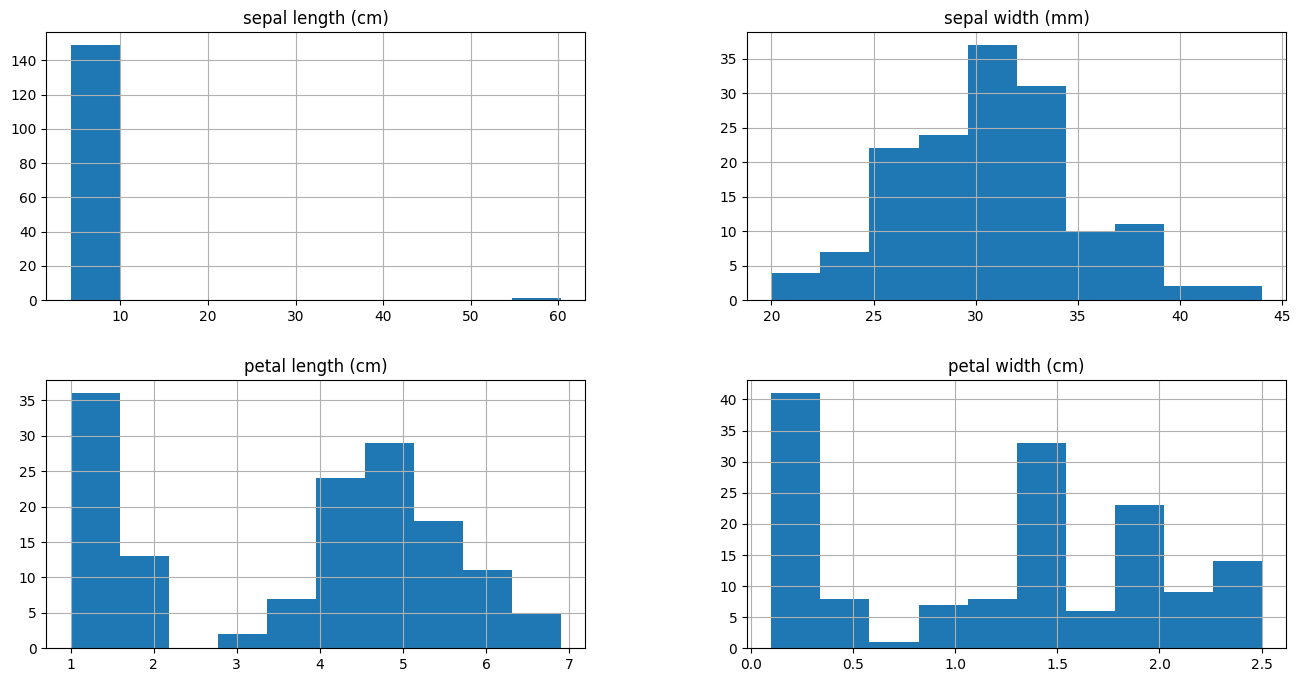

In [8]:
_ = df.hist(figsize=(16,8))

The histograms above show the distribution of values for all parameters separately. <br>
Immediately it can be seen that the distribution in the `sepal length (cm)` plot looks off. <br>
Together with our conclusion of the `sepal length (cm)` from the summary statistics, this might indicate an outlier. <br>
To define whether this hypothesis is true, a boxplot can give some deeper understanding.

`[DataFrame].boxplot()` returns boxplots of the data for all columns (parameters) separately. The box shows the range from the first to the third quartile, with the median displayed as the line in the middle. The total length between the first and third quartile (de length of the box) is defined as the Inter Quartile Range (IQR). The whiskers outside the box are set to be 1.5 times this IQR value, as this is perceived as the allowed minimum and maximum values. An outlier would be any point outside the whiskers, however as the boxplots only concern a quick measure this conclusion has to be made with caution. There are statistical tests to define whether a value is indeed an outlier or not, but the complexity of such tests exceed the purpose of this course. In most cases it suffices to rely on a soft measure, to be decided whether the distance between the whisker and the value is indeed significant.

Here, we save the boxplot to a variable called `boxplot`. This because in the `[DataFrame].boxplot()` we have the option to save returning values to (in this case) a `dict` (dictionary). It contains the Lines making up the boxes, caps, fliers, medians, and whiskers. This may come in handy when we want to further investigate one of these points.

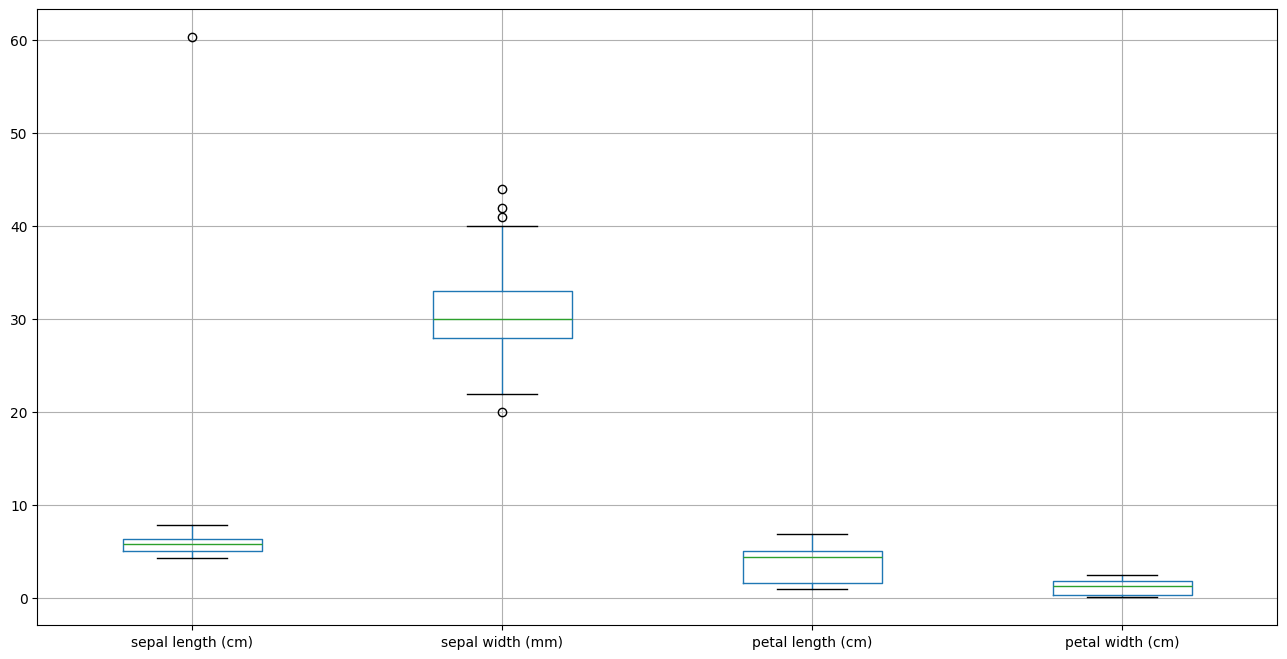

In [9]:
boxplot = df.boxplot(figsize=(16,8), return_type='dict')

Looking at the boxplot of the `sepal length (cm)`, the maximum point we distinguished earlier is shown to be way above the whiskers. <br>
This indicates that this value, as it shows significant distance from the whiskers, concerns an outlier. <br>
The points outside the whiskers of the `sepal width (mm)` will be discussed later on. <br>

To see if we have strongly correlated variables in the dataset, we can use the correlation matrix. <br>
Adding strongly correlated variables to a Machine Learning (ML) model increases the complexity. <br>
The increased complexity will thereafter require more computing power to train and use the model. <br> 
When leaving one of the strongly correlated variables out of a ML model increases the computation effeciency (higher dimensionallity) and doesn't effect the predictive power of the model significantly.

`[DATAFRAME].corr()` - Returns a matrix, displaying the correlations between all columns (parameters). As highly correlated values do not add any knowledge and just add complexity to your model, it is a good practice to remove these values during **feature selection**.

In [10]:
# We don't use the state column because it is not numerical.
df.corr()

,sepal length (cm),sepal width (mm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.123984,0.209104,0.181358
sepal width (mm),-0.123984,1.000000,-0.438375,-0.366126
petal length (cm),0.209104,-0.438375,1.000000,0.962885
petal width (cm),0.181358,-0.366126,0.962885,1.000000


The steps above conclude the **Exploratory Data Analysis (EDA)**, which is executed to gain knowledge about your data. <br>
The gained knowledge from execution of the **data understanding phase** will be used in the consecutive phases. <br>
It will mostly be the basis on which you decide which data preprocessing steps need to be executed in the next phase, **data preparation**.


To test whether the conclusion you made based on the EDA are correct, we ask you to fill in the following values.

### Question A1
Put the number of missing values for `petal length (cm)` into `Q_A1` as `int` (no decimals).

In [11]:
Q_A1 = 5

module.check('A1', Q_A1)

🟢 That's correct!       


5

### Question A2
Put the average value for `sepal_width (mm)` into `Q_A2` as float rounded to two decimals.

In [12]:
Q_A2 = 30.57

module.check('A2', Q_A2)

🟢 That's correct!       


30.57

### Question A3
Put a list of the columns that are highly correlated into `Q_A3` as a list of `str`. The order does not matter.

You can use the list below and remove the columns that are not highly correlated.
```python
['sepal length (cm)', 'sepal width (mm)', 'petal length (cm)', 'petal width (cm)']
```

In [13]:
Q_A3 = ["petal length (cm)", "petal width (cm)"] 

module.check('A3', Q_A3)

🟢 That's correct!       


['petal length (cm)', 'petal width (cm)']

[Back to top](#module-4---machine-learning-ml)

<hr>

## B. Data preparation
Before we apply Machine Learning (ML) algorithms to the data, we have to prepare it. <br>
In the EDA we observed that there are missing values, outliers and a strong correlation between two columns. <br>
However, besides the found characteristics, more steps can be needed to prepare the data. <br>
The standard procedure consists of multiple so-called pillars, namely:

* **Data integration** - Combining multiple data sources into one, handling data redundancy.
* **Data cleaning** - Remove outliers, impute missing values an handle data inconsistencies.
* **Data transformation** - Adjust numerical and categorical values to allow the model to work with them.
* **Data (feature) selection** - Select which values to include into your model.
* **Data reduction** - Simplify data where possible by for example producing aggregate values.

[Back to top](#module-4---machine-learning-ml)

### B1. Data integration

If we would have had multiple datasets, this pillar would be used to join them into one. <br>
Pandas has a function for this, which looks like this: `[DataFrame].merge([DataFrame])`. <br>
As we only have data from a single source, we do not need to execute this data preparation pillar.

[Back to top](#module-4---machine-learning-ml)

### B2. Data cleaning
The cleaning pillar consists of different parts which all need to be adressed, namely:
* **Outliers** - Ouliers can be detected by for example the previously used boxplot visualisation. Such outliers can either be entirely removed or the actual value can be updated (for example by replacing it with the mean).
* **Missing values** - As mentioned in the introduction of Section B, missing values are detected. Such missing values can be imputed, with for example the mean or median, or completely removed.
  *  **Pro removal** - A model trained with the removal of all missing values creates a robust model.
  *  **Con removal** - If removed, all the information that is in the other columns is removed as well. This especially works poorly if the percentage of missing values is excessive in comparison to the complete records.
*  **Inconsistent data** - The unit metric for one column in the dataset is different, for example the inconsistent use of `mm` or `cm`.

Please answer the following questions:

### Question B1
Provide a list of all the points outside the boxplots (outside the wiskers) in `Q_B1` as a list of `float`.

> **Tip** - Use the saved variable boxplot to retrieve these points.

> **Tip** - `outliers = [flier.get_ydata() for flier in boxplot["fliers"]]`

In [14]:
Q_B1 = [60.3, 20.0, 44.0, 41.0, 42.0]

module.check('B1', Q_B1)

🟢 That's correct!       


[60.3, 20.0, 44.0, 41.0, 42.0]

### Question B2
Provide the actual outlier from the boxplot as a `float`.

In [15]:
Q_B2 = 60.3

module.check('B2', Q_B2)

🟢 That's correct!       


60.3

Concluding from the retrieved values, the maximum value of the `sepal length (cm)` is clearly an outlier. <br>
Not only does it stand out in the visualisation, it also is an impossible length of a flower. <br>
Looking at the value we might consider that by accident an additional 0 is added when inserting the measurements. <br>
For this reason we decide to not remove the entire record, but we only remove the 0 to prevent data to be lost. <br>
The other values in the `sepal width (mm)` boxplot are not found te be outliers. These values lie within `1.5 * IQR` and therefore not fall outside the overall pattern in the distribution.

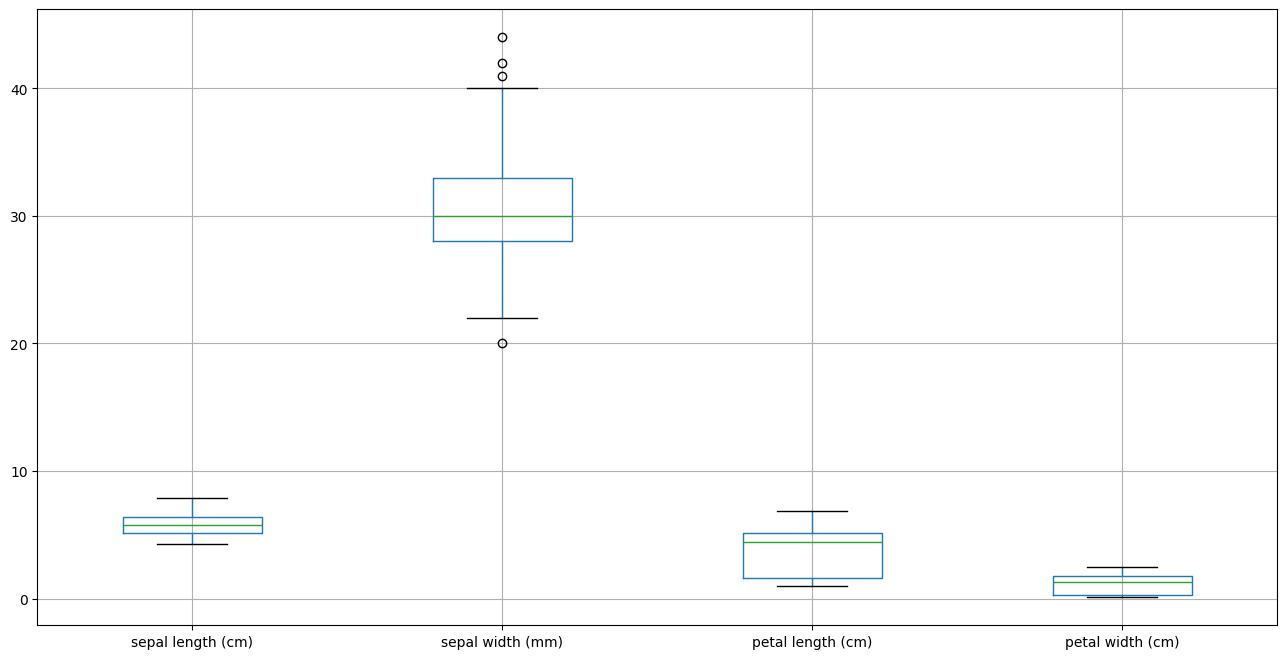

In [16]:
# Remove the actual outlier
module.remove_zero_in_outlier(df, outlier_value=Q_B2)

# Check in the boxplot whether the outlier has been removed
_ = df.boxplot(figsize=(16,8))

As we conclude the handling of **outliers**, we now continue to **missing values**.<br>
An often used library to handle missing values is `scikit-learn`, often abbreviated to `sklearn`. <br>
[Scikit-learn](https://scikit-learn.org/stable/) is an extensive Machine Learning (ML) library, available for Python. <br> 
This free ML library includes modules for the preparation of data and the design, training and use of actual ML models. <br>
We recommend you get familiair with the [Scikit-learn documentation](https://scikit-learn.org/stable/), as you will often use it in your Data Science ventures.

For this module you will implement the k-Nearest Neighbors imputer for filling in the missing values. <br>
Each missing value will be imputed with the mean of the `n` closest values found in the dataset. <br>
Close in this sense is a distance measure of all values available for the concerning record.

In [17]:
from sklearn.impute import KNNImputer

# Load and set the K-Nearest Neighbours imputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")

# Fit to the numerical data, then transform it and save the imputed values.
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

The handling of missing values needs to happen intelligently to create a robust Machine Learning (ML) model. <br>
Doing this can be done in several ways mostly depending on how and what the data is about, for example either categorical or numerical values. <br>
Having domain knowledge about the dataset is crucial for this, as it gives insight into how preprocessing needs to be applied.

Normally, if you apply imputation on your dataset, you should only use the training dataset to fit the transformer after applying it to both the train and test set. <br>
This prevents the occurrence of **data leakage**, which is the phenomenon that knowledge that should not be available is available to the model. <br>
A train-test split is used to train a model on the training set and then evaluate its performance on a test dataset that it did not see before. <br>
If you allow the test data to be taken into account for imputation, some knowledge of the set that should be unknown is known to the trained ML model resulting in misleading evaluation of the model.

Finally we handle a single **data inconsistency** that is in the measuring unit used to define the `sepal width (mm)` as opposed to other parameters. <br>
The `sepal width (mm)` is given in `mm`, whereas the other parameters are given in `cm`.

### Question B3
To deal with this, do the following:

1. Change the metric system used by dividing the `sepal width (mm)` column by `10`.
2. Change the column name to the correct reference `sepal width (cm)`.

In [18]:
# Multiply each value by 10
df['sepal width (mm)'] = df['sepal width (mm)'].apply(lambda x: x/10)

# And rename the column to 'sepal width (cm)'
df = df.rename(columns={'sepal width (mm)':'sepal width (cm)'})

module.check('B3', df)

🟢 That's correct!       


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


For the next chapter, we add the `state` to the DataFrame.

In [19]:
df = module.add_state(df)

[Back to top](#module-4---machine-learning-ml)

### B3. Data transformation

Data Transformation is applied to make the data more suitable for the underlying mathematics of the Machine Learning (ML) models. <br>
Properly formatted data improves the quality of the deduced models, which will eventually lead to better outcomes. <br>
The transformations that can be applied differ for different types of data, which are described below:

#### Categorical values

* **Ordinal encoding** <br>
Assigns an integer value to each category in the order they are encountered. <br> 
Only really useful if there exist a natural order in categories because the model will consider one category to be ‘higher’ or ‘closer’ to another if their assigned values are ‘higher’ or ‘closer’.

* **One-hot encoding** <br>
Creates a column for all categories separately, assigning a 1 if that category applies to that row, otherwise assigning a 0. <br>
Can explode if a column has lots of categories, causing issues with high dimensionality.

#### Numerical values

* **Normalisation** <br>
Changes the range between which the values lie. Examples are: *min-max*, *z-score*, *logarithmic*.

* **Discretize** <br>
Classify all values within certain bins, for example cutting the range from 0-10 into bins 1.0-2.5, 2.6-5.0, 5.1-7.5 and 7.6-10.0 


To practice, we will transform the categorical column `state` using one-hot-encoding. <br>
This can be done using the in-built function of `pandas` called `get_dummies()`.

In [20]:
import pandas as pd

df = pd.get_dummies(df)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),state_dry,state_wet
0,5.1,3.5,1.4,0.2,False,True
1,4.9,3.0,1.4,0.2,True,False
2,4.7,3.2,1.3,0.2,False,True
3,4.6,3.1,1.5,0.2,False,True
4,5.0,3.6,1.4,0.2,False,True
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,True
146,6.3,2.5,5.0,1.9,True,False
147,6.5,3.0,5.2,2.0,True,False
148,6.2,3.4,5.4,2.3,True,False


By executing the `get_dummies()` function, we now transformed all categorical variables. <br>
Now we will focus on the numerical variables, which can be transformed using normalization or scaling. <br>
Scaling becomes especially important if you use distance dependend techniques, like for example clustering. <br>
In these cases, without clustering, values that spread over a longer range can automatically be viewed as more important.

For the Iris dataset the distribution of values over different parameters is quite similar. <br>
For this reason it is not really necessary to apply scaling with regards to this dataset. <br>
However we still apply it, as it will not decrease the quality of the data and this way you can learn to work with them as well.

We will be using the Min-Max scaler, that transforms features by scaling them between the minimal and maximal value. <br>
Despite the simplicity of the method, it is very often used in practice as it preserves the distribution while placing it on a set range. <br>
The set range is between zero and one, which together with one-hot-encoding results in all values being in the range 0 to 1. <br>
Min-Max scaling is applied by relating the value of x to the range between the minimal and maximal value found for that parameter. <br>
This technique can be mathematically formulated as follows:

$x_{new} = \frac{x - x_{min}}{x_{max} - x_{min}} * (x_{max} - x_{min}) + x_{min}$

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Robust scaling the data
scaler = MinMaxScaler()

# Fit to data, then scale it.
df[list(df.columns)] = scaler.fit_transform(df[list(df.columns)])

[Back to top](#module-4---machine-learning-ml)

### B4. Data (feature) selection

As previously stated, the more parameters you have the complexer the Machine Learning (ML) has to be. <br>
The increased complexity will thereafter result in more computing power needed to train and use the model. <br>
Besides this, too much values can even worsen te performance of the trained model. <br>
An example of this is with highly correlated values, as they are present multiple times, the model will unintendetly focus on this value more. <br>
This will result in an output biased towards the correlated value, which is often further away from the actual truth.

To prevent the downside of having too much features, Data (Feature) Selection is applied. <br>
There are many approaches to do this, of which the following are often used:

* Decide which features suit the task and algorithm based on Phase 1 and 2: Business and Data Understanding.
* Apply ***Ablation***, which implies iteratively trying different subsets of features and evaluate model performance.
* Let the ML algorithm decide on the features, which can be done by looking at feature importances or through so-called **AutoML**.

Due to the simplicity of the task and dataset, approach 1 based on business and data understanding will be sufficient. <br>
First, based on business understanding, we can conclude that the columns `state_wet` and `state_dry` will not have added value to the task. <br>
Thereafter, looking at data understanding, we saw that the `petal length (cm)` and `petal width (cm)` were highly correlated. <br>

[Back to top](#module-4---machine-learning-ml)
### Question B4
To prevent unnecessary model complexity, it is your task to remove `petal width (cm)`, `state_wet`, and `state_dry` from the dataset.

In [22]:
df = df.drop(columns=['petal width (cm)', 'state_wet', 'state_dry'])

module.check('B4', df)

🟢 That's correct!       


,sepal length (cm),sepal width (cm),petal length (cm)
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797
...,...,...,...
145,0.666667,0.416667,0.711864
146,0.555556,0.208333,0.677966
147,0.611111,0.416667,0.711864
148,0.527778,0.583333,0.745763


[Back to top](#module-4---machine-learning-ml)

### B5. Data reduction
The final step is the transformation of data into a corrected, ordered, and simplified form. The purpose of data reduction can be two-fold:

* Reduce the number of data records by eliminating invalid data or produce summary data.
* Produce aggregated statistics at different levels of detail for various applications.

As the used data is not that complex, we will leave this step as it is for now.

[Back to top](#module-4---machine-learning-ml)
<hr>

## C. Modelling 

After execution of all the preprocessing steps, the data is now ready to be used to create some Machine Learning (ML) models. <br>
As shown in the Easy-LMS course, the field of Machine Learning can be subdivided into three categories: 

* **Unsupervised Learning** - Used to identify patterns in data sets containing data points that are neither classified nor labeled.
* **Supervised Learning** - Learn a function from labeled training data that maps an input to an output based on example input-output pairs.
* **Reinforcement Learning** - A learning method in which an agent is trained through interacting with an environment and receiving feedback.

Both Unsupervised as Supervised Learning are often used in practice, where Reinforcement Learning is not that integrated just yet. <br>
For this reason, this notebook will primarily focus on these two types of modelling, starting with unsupervised learning.

[Back to top](#module-4---machine-learning-ml)

### C1. Unsupervised learning

The Iris dataset we have been working with so far does show the characteristics of different Iris flower species. <br>
However they are not classified nor labelled, which leaves us in the unknown how many species there are and to what species specific records belong. <br>
Solving this can be done using Unsupervised Learning, more specifically using a **distance-based clustering** algorithm.

Unsupervised Learning algorithms, and thus clustering algorithms as well, are able to identify patterns in the available data. <br>
Through this, we are thus able to group certain records together without a need for labaled data. <br>
To let you experience the power of such techniques we will let you work with a method called **K-Means Clustering**.

K-Means Clustering is a classification algorithm that groups objects into `k` groups based on the relative distance between different datapoints.<br>
For the creation of the K-Means algorithm we again return to the Machine Learning library Scikit-Learn, for which we refer to the [KMeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for further reference.

Initially we will set the number of clusters (`k`) to 2, feel free to change this value and see what happens in the plot visualisation. <br>
You will notice that the clustering depends on the value set for the hyperparameter `k`.

c:\Users\Gebruiker\Projects\datacademy projects\datacademy-v2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Gebruiker\Projects\datacademy projects\datacademy-v2\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


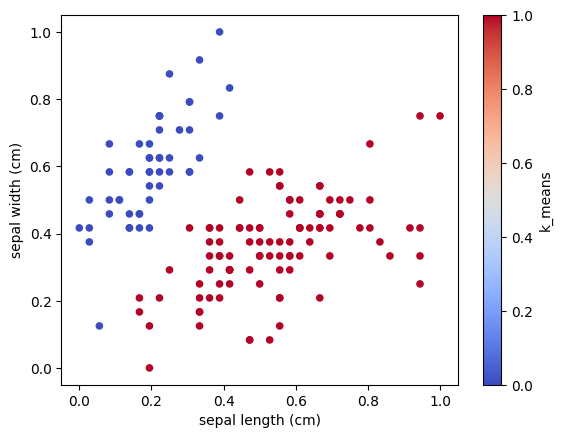

In [23]:
from sklearn.cluster import KMeans

# Number of clusters
k = 2

# K-Means clustering
kmeans_model = KMeans(n_clusters=k, random_state=0, n_init='auto')
kmeans_model.fit(df)

# Add predicted values to a new column in the DataFrame
df['k_means'] = kmeans_model.predict(df)

# Plot the results in a 2D scatterplot
scatter = df.plot.scatter(x='sepal length (cm)', y='sepal width (cm)', c='k_means', colormap='coolwarm')

[Back to top](#module-4---machine-learning-ml)
### C2. Supervised learning

In the case we have labelled data in our possession, supervised learning becomes possible. <br>
Supervised learning can be used to predict either a continuous quantity (**regression**) or discrete class labels (**classification**). <br>
A simple example for regression would be to predict the weather of tomorrow, where classification would predict if it will rain yes or no.

The supervised learning task you will be working on is to classify to which species a given Iris flower belongs, which is a classification task. <br>
To do this, we will extend the currently used data with a target column which describes the species of all records. <br>
There exist a wide range of Supervised Learning algorithms, of which we will use the following:

* [**K-nearest neighbours**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) - Classify a data point based on the class of its `k` closest neighbors, using majority voting.
* [**Support Vector Machine**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) - Classify data points based on dividing the data space based on a maximized distance between certain vector points.
* [**RandomForestClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) - Classify data points through an ensemble of different decision tree classifiers, often using majority voting.

We selected these algorithms as they apply classification in significantly different ways. <br>
A more in depth explanation of these methods can be found in the Scikit-learn documentation, which can be found following the hyperlinks behind their reference.

Before being able to test these models we need to extend our current Iris dataset with the target labels and remove the clustered labels. <br>

This will be done with a pre-written function, which is executed when running `module.get_supervised()`. <br>
The DataFrame you have been working on will be replaced with a new DataFrame, removing all preprocessing steps you have made. <br>
Removal of these steps is mandatory, as during preprocessing we did not use a train-test split, resulting in data-leakage.

In [24]:
# First save the unsupervised dataset
df.to_csv('unsupervised.csv', index=False)

# Then get the supervised one
df = module.get_supervised()
df

,sepal length (cm),sepal width (mm),petal length (cm),petal width (cm),state,target
0,5.1,35.0,1.4,0.2,wet,0
1,4.9,30.0,1.4,0.2,wet,0
2,4.7,32.0,1.3,0.2,dry,0
3,4.6,31.0,1.5,0.2,dry,0
4,5.0,36.0,1.4,0.2,dry,0
...,...,...,...,...,...,...
145,6.7,30.0,5.2,2.3,wet,2
146,6.3,25.0,5.0,1.9,wet,2
147,6.5,30.0,NaN,2.0,dry,2
148,6.2,34.0,5.4,2.3,dry,2


[Back to top](#module-4---machine-learning-ml)
#### Information leaks
As previously mentioned, a train-test split is needed to properly evaluate the performance of a Machine Learning (ML) model. <br>
During **Unsupervised Learning** we did not make this split, for which reason we renounce the preprocessing steps we previously made. <br>
The reason for this is data leakage, in which for example the missing values are imputed with the mean over all values. <br>
This results in the model using data that it is not allowed to see, as visualized in the image below.

![Information leak visualisation](img/information_leak.png)

[Back to top](#module-4---machine-learning-ml)
#### Pipelines
To prepare our data, we would now have to split the data into two data sets and then repeat all preprocessing steps. <br>
As this would be labour intensive, a smarter way to execute this is desired, called **Pipelines**. <br>
Pipelines are created like a procedure, taking the data input through all the steps described upon creation of the pipeline.

Again the library Scikit-learn helps us in creating these [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), allowing to not only insert preprocessing steps but also actual models. <br>
These pipelines have a fit, predict and score function integrated, which automatically ensure that data transformations are applied correctly. <br>
Besides being a more professional and user-friendly way of programming, it also prevents any change of having data leakages in your process.

Pipelines can combine multiple processing steps and a single estimator. <br>
However, in some cases one pipeline is insufficient, for example when categorical data needs to be handled differently than numeric data. <br>
If this is needed, separate pipelines can be made after which they are composed into a single pipeline, which we will show later on. <br>
Despite their utility, pipelines are not able to replicate all preprocessing steps that we executed on the dataset (at least not without great effort). <br>
The steps that require human intervention, like removing outliers, changing inconsistencies and removing certain columns are better to be done by hand.

[Back to top](#module-4---machine-learning-ml)
### Question C1
Please perform the following actions on the `df` Dataframe:

* Change the metric system used by dividing the `sepal width (mm)` column by `10` and change the column name to the correct reference `sepal width (cm)`.
* Use `module.remove_zero_in_outlier(df, outlier_value=<actual_value>)` to remove the outlier.
* Remove `petal width (cm)` from the dataset.
* View the first 5 rows of the Dataframe.

Be aware, in the following steps we **do not** remove the "state" column, which we previously did. <br>
The reason for this is that we want to show you how to create such pipelines when you have both categorical and numerical variables. <br>
We found that leaving in the "state" column will affect performance significantly, however we deemed this unimportant for the purpose of learning how to apply ML.

In [25]:
# Execute preprocessing steps that require human intervention.
df['sepal width (mm)'] = df['sepal width (mm)'].apply(lambda x: x/10)
df = df.rename(columns={'sepal width (mm)':'sepal width (cm)'})

module.remove_zero_in_outlier(df, 60.3)
df = df.drop(columns=['petal width (cm)'])

# Check answer
module.check('C1', df)

🟢 That's correct!       


,sepal length (cm),sepal width (cm),petal length (cm),state,target
0,5.1,3.5,1.4,wet,0
1,4.9,3.0,1.4,wet,0
2,4.7,3.2,1.3,dry,0
3,4.6,3.1,1.5,dry,0
4,5.0,3.6,1.4,dry,0
...,...,...,...,...,...
145,6.7,3.0,5.2,wet,2
146,6.3,2.5,5.0,wet,2
147,6.5,3.0,NaN,dry,2
148,6.2,3.4,5.4,dry,2


[Back to top](#module-4---machine-learning-ml)
#### Creating the pipeline
Now we have executed all manual transformations to the data, it is time to create the data pipeline. <br>
As we did not remove the "state" column, we now need to create multiple pipelines. <br>
First we will create a numerical and categorical pipeline, after which we combine both and append a classifier to it. <br>
To do this we create a function named `create_pipeline()`, as this allows us to create these pipelines dynamically. <br>
This will be useful for the way we intend to test the three classification models mentioned before in a looping fashion.

In [27]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


def create_pipeline(imputer, scaler, encoder, clf) -> Pipeline:
    """
    Take the imputer, scaler, encoder and classifier and create and return a sklearn pipeline.

    Args:
        imputer (_type_): Imputer module, used to impute missing values in the data.
        scaler (_type_): Scaling module, used to scale the data to a set range of values.
        encoder (_type_): Encoding module, used to transform categorical values to a workable format.
        clf (_type_): Classification model, which can be any model from the sklearn classification model catalog.

    Returns:
        Pipeline: Pipeline containing all preprocessing and classification models.
    """
    # 2 sub-pipelines, one for numeric features, other for categorical ones
    numeric_pipe = make_pipeline(imputer, scaler)
    categorical_pipe = make_pipeline(encoder)

    # Using categorical pipe for feature State, numeric pipe otherwise
    preprocessor = make_column_transformer((categorical_pipe, ["state"]), 
                                            remainder=numeric_pipe)
    
    return Pipeline(steps=[('preprocess', preprocessor), ('clf', clf)])

Certain things can be seen when looking at the created function above:

* First, again we return to the Scikit-Learn package to help us create our Machine Learning [`Pipelines`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). 
* Second, the pipeline consists of multiple subpipelines, namely a numeric and a categorical pipeline:
  * The numeric pipeline handles the numeric values and applies the [`KNNImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) and [`MinMaxScaler`()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
  * The categorical pipelines handles the categorical values, in this case the "state" column, and applies the Scikit-Learn in-built code for the [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).
  
In this case we use Scikit-Learn to apply One Hot Encoding, as the `pandas` in-built function `get_dummies()` cannot be integrated into a Scikit-Learn pipeline.
Eventually both pipeliens are combined through the use of the Scikit-Learn in-built function [`make_column_transformer()`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html).

As can be seen in the code and the documentation, you can combine multiple pipelines using this function by defining which columns flow through which pipelines. <br>
Eventually we create our final pipeline, which defines the combined preprocessor pipeline and the classification model given to the function.

[Back to top](#module-4---machine-learning-ml)

#### Cross-validation
The quality of the supervised learning method is in a big way dependent on de amount of data that is available. <br>
As we have to split the data into a train and test set, the set used for training the model also decreases in size. <br>
For this reason it is a must to put this data to good use to get a reliable evaluation of the performance of different models.

Within the Iris dataset we have been using only 150 rows are present, which is not much when training Machine Learning (ML) models. <br>
For this reason we will intelligently create train-test splits that will allow us to utilize the entire data for model evaluation. <br>
The type of evaluation we will be using is called **K-fold Cross-Validation**, which is a technique to train and test models based on iteratively different subsets of the data. <br>
The process of cross-validation using five iterations is shown in the following visualisation.

![Cross validation visualisation](img/cross_validation.png) <br>

Within this visualisation (`K` = 5), which implies that five iterations will be used to evaluate the models.<br>
The score of the model is the mean score over all five iterations, which is returned as the final score. <br>
Below we will use the Scikit-Learn in-built function for [K-fold Cross-Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). <br>
This function will automatically execute the given number of fold (`cv`), which we set to 5, and return the attained performance.

In [28]:
from sklearn.model_selection import cross_val_score

# Create preprocessing steps into variables
imputer = KNNImputer()
scaler = MinMaxScaler()
encoder = OneHotEncoder()
classifiers = [
     KNeighborsClassifier(), 
     SVC(random_state=0), 
     RandomForestClassifier(random_state=0)
]

# Split data into independent variables (X) and dependent variable (y)
X = df.copy().drop('target', axis=1)
y = df['target']

# Test each different classifier
for clf in classifiers:
     # Combine with learning algorithm in another pipeline
     pipe = create_pipeline(imputer, scaler, encoder, clf)

     scores = cross_val_score(
          estimator=pipe, 
          X=X, y=y,
          cv=5)
     print('{:>25} | Test Scores: {:>25} | Mean Test Score: {:.3f} | Standard deviation: {:.3f}'.format(pipe['clf'].__class__.__name__, str(['{:.3f}'.format(round(s, 3)) for s in scores]), round(scores.mean(), 3), round(scores.std(), 3)))

     KNeighborsClassifier | Test Scores: ['0.933', '0.967', '0.833', '0.900', '0.933'] | Mean Test Score: 0.913 | Standard deviation: 0.045
                      SVC | Test Scores: ['0.800', '0.900', '0.833', '0.867', '0.967'] | Mean Test Score: 0.873 | Standard deviation: 0.057


   RandomForestClassifier | Test Scores: ['0.933', '0.933', '0.867', '0.933', '0.967'] | Mean Test Score: 0.927 | Standard deviation: 0.033


The returned values from **K-fold Cross Validation** need to be interpreted in several ways to get a complete view of the model performances. <br>
First the individual test scores are shown, which show an overview how well every model performed on different iterations. <br>
In itself this does not say much, but what needs to be looked at is the mean and standard deviation of these scores.

A Machine Learning model has two distinct features which are important evaluation metrics, namely performance and robustness. <br>
Performance can be compared using the mean test scores, for which a high score implies a good performing model. <br>
The robustness however is in some cases as important as the performance, which is described in the standard deviation of all test scores. <br>
If the standard deviation is high, the test scores for different iterations (folds) is significantly inconsistent. <br>
This means that the performance of the model is dependent on which data you feed it, which is of course not desired as it shows to be unstable in practice. 


Please use the above scores to select the best performing model, which we will take through the final phase of the CRISP-DM model: **Evaluation**. <br>
For the best performing model we create another dataframe called `df`. <br>
Before going to the final phase, you need to:

*
<ol>
    <li> Remove the "state" column from the dataframe <code>df</code>. And specify the new X and y values. </li>
    <li> Create a function called <code>best_model_pipeline</code> that returns a pipeline for the cleaned dataframe (with state removed) with the best performing model. </li>
    <li> Run <code>func.save_pipeline_for_later_evaluation(df=df, pipeline=best_model_pipe)</code> and make sure your classifier has the argument <code>random_state=0</code>. </li>
    <li> And finally run a K-fold Cross Validation with <code>K=4</code>. </li> 
</ol>

[Back to top](#module-4---machine-learning-ml)

### Question C2
Remove the `state` column from the dataframe `df`. And specify the new `X` and `y` values.

In [29]:
df = df.drop(columns=['state'])

X_new = df.copy().drop('target', axis=1)
y_new = df['target']

# Check the newly specified values.
module.check('C2-DF', df)
module.check('C2-X', X_new)
module.check('C2-Y', y_new.tolist())

🟢 That's correct!       


,sepal length (cm),sepal width (cm),petal length (cm),target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,NaN,2
148,6.2,3.4,5.4,2


🟢 That's correct!       


,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,NaN
148,6.2,3.4,5.4


🟢 That's correct!       


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

[Back to top](#module-4---machine-learning-ml)
### Question C3
Create a function called `best_model_pipeline` that returns a pipeline that can be used by the cleaned dataframe (with state removed) with the best performing model.

In [30]:
def best_model_pipeline(imputer, scaler, clf) -> Pipeline:
    """
    Take the imputer, scaler, and classifier and create and return a sklearn pipeline.

    Args:
        imputer (_type_): Imputer module, used to impute missing values in the data.
        scaler (_type_): Scaling module, used to scale the data to a set range of values.
        clf (_type_): Classification model, which can be any model from the sklearn classification model catalog.

    Returns:
        Pipeline: Pipeline containing all preprocessing and classification models.
    """
    # A sub-pipelines, one for numeric features
    numeric_pipe = make_pipeline(imputer, scaler)

    # Using categorical pipe for feature State, numeric pipe otherwise
    preprocessor = make_column_transformer((numeric_pipe, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']))
    
    return Pipeline(steps=[('preprocess', preprocessor), ('clf', clf)])

# Initialize the created pipeline function
best_model_pipe = best_model_pipeline(KNNImputer(), MinMaxScaler(), RandomForestClassifier(random_state=41))

# Return the scores from the cross validation
scores_best_model_pipe = cross_val_score(estimator=best_model_pipe, X=X_new, y=y_new, cv=4)
print('{:<25} | Test Scores: {:>25} | Mean Test Score: {:.3f} | Standard deviation: {:.3f}'.format(best_model_pipe['clf'].__class__.__name__, str(['{:.3f}'.format(round(s, 3)) for s in scores_best_model_pipe]), round(scores_best_model_pipe.mean(), 3), round(scores_best_model_pipe.std(), 3)))

# Check the scores
module.check('C3', round(float(scores_best_model_pipe.mean()), 2))

RandomForestClassifier    | Test Scores: ['0.947', '0.895', '0.892', '0.919'] | Mean Test Score: 0.913 | Standard deviation: 0.022
🟢 That's correct!       


0.91

[Back to top](#module-4---machine-learning-ml)

<hr>

## D. Evaluation
Normally when you work through the CRISP-DM model you work through it with only a single Machine Learning (ML) model. <br>
However, in this module, we actually created both a Unsupervised Learning model (KMeans) and multiple Supervised Learning models. <br>
On the backend we saved the data used for Unsupervised Learning, so we can re-use it here. <br>
If you would have evaluated these models separately you would not face this issue, but to maintain the CRISP-DM workflow we perceived this to be the best way to show it to you.

[Back to top](#module-4---machine-learning-ml)

### D1. Unsupervised learning: KMeans clustering

First we will focus on evaluating the performance of the Unsupervised Learning model we created earlier using [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering. <br>
The evaluation will imply defining the number of clusters that are present in the data, and fine-tuning this to optimize the output of the model. <br>

In [31]:
# Retrieve unsupervised dataset and remove k_means
unsupervised_df = pd.read_csv('unsupervised.csv')
unsupervised_df.drop('k_means', axis=1, inplace=True)
unsupervised_df.head()

,sepal length (cm),sepal width (cm),petal length (cm)
0,0.222222,0.625000,0.067797
1,0.166667,0.416667,0.067797
2,0.111111,0.500000,0.050847
3,0.083333,0.458333,0.084746
4,0.194444,0.666667,0.067797


Evaluation of the number of clusters used in K-Means clustering can be done using the **Elbow Criterion**. <br>
The idea of the Elbow Criterion method is to choose a number of clusters (`k`) based on a visualisation of the Sum of Squared Errors (SSE).

The SSE is also called the Within Cluster Variation or the Inertia of the model, and it indicates the variation of the data points that belong to a single cluster. <br>
The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid.

We therefore normalized the data because it calculates the distance between the features of a variable and the centroid. <br>
If we don't normalize the data when using unsupervised learning methods, there could be a distance bias.

The Elbow plot, which is a visualisation of the SSE for different amounts of clusters, will always show a decreasing value as the amount increases. <br>
However, at some point the decrease of the SSE seems to slow down, which might resemble an arm and an elbow. <br>
The optimal number of clusters is at the point of the elbow in the plot, so where the speed of decline seems to slow down significantly. <br>
As this is quite a subjective way to determine the amount of clusters, we would recommend that if you have doubt round up the amount of clusters.

Below we will test different amounts of clusters, varying between 1 and 8. <br>
We will use the `matplotlib` function [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to visualise the SSE over different amounts of clusters. <br>
Therafter we will decide if the earlier chosen 2 clusters was optimal, or if another number of clusters would have been better.

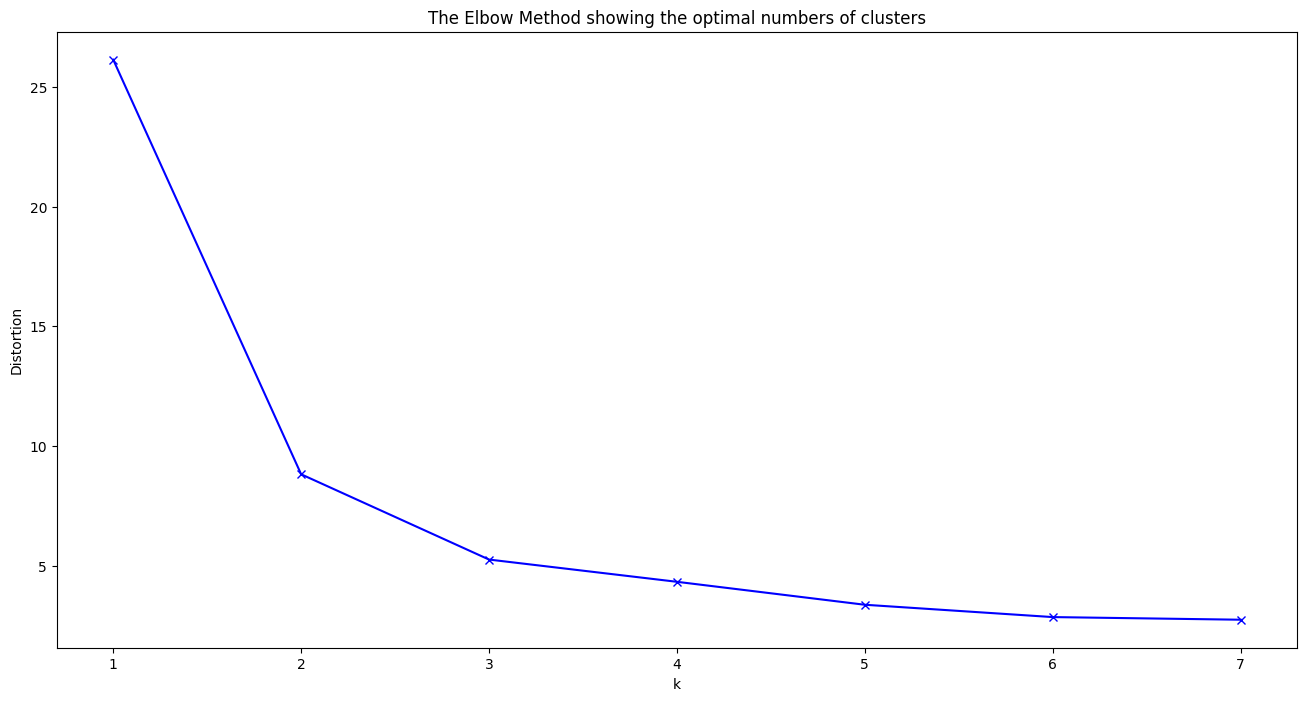

In [32]:
import matplotlib.pyplot as plt

WithinClusterVariation = []
for k in range(1,8):
    kmean_model = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmean_model.fit(unsupervised_df)
    WithinClusterVariation.append(kmean_model.inertia_)

def plot_clusters(K, WCV):
    plt.figure(figsize=(16,8))
    plt.plot(K, WCV, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal numbers of clusters')
    plt.show()

plot_clusters(K=range(1,8), WCV=WithinClusterVariation)

[Back to top](#module-4---machine-learning-ml)
### Question D1
Looking at the plot above, what do you think is the optimal number of clusters? <br>

Please specify your best choice for the optimal number of cluster.

> **Tip** - If you are unsure about two values, pick het highest value!

In [33]:
# Set the optimal number of clusters found in the Elbow plot
Q_D1 = 3

module.check('D1', Q_D1)

🟢 That's correct!       


3

[Back to top](#module-4---machine-learning-ml)
### D2. Supervised learning: classification model

For supervised learning there are a lot of possibilities to evaluate the performance of the models you created. <br>
With classification most often used way is to use a so-called **Confusion Matrix**, which shows the predicted and true labels. <br>
Within a confusion matrix four classifications are possible, described below for a classification with two categories True and False. 

* **True Positive (TP)** - The value is *correctly* predicted to be True.
* **False Positive (FP)** - The value is *incorrectly* predicted to be True.
* **True Negative (TN)** - The value is *correctly* predicted to be False.
* **False Negative (FN)** - The value is *incorrectly* predicted to be False.

True and False in a classification task can be viewed broadly, for example in classifying if an image shows an apple. <br>
If an apple is shown in the image and it is predicted this way it concerns a True Positive (TP). <br>
If the prediction said classified it to be False, that no apple is in the image, than it would be a False Negative (FN) and so on. 

For multi-class classification, with more than two classes, the same mechanics apply. <br>
If we have to classify if the image either shows an apple, pear or strawberry the following classifications are possible. <br>
We view these classification from one class, take the apple for this example.

* **True Positive (TP)** - It is classified to show an apple when an apple is shown in the image.
* **False Positive (FP)** - It is classified to show an apple when either a pear or strawberry is shown in the image.
* **True Negative (TN)** - It is classified to show either a pear or strawberry when indeed no applie is shown.
* **False Negative (FN)** - It is classified to show either a pear or stawberry when actually an apply is shown.

Below you will use the Scikit-Learn in-built function [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), which creates a Confusion Matrix based on the predicted and true labels. <br>
Within the function the display labels are given, which are the actual names of the plant species.

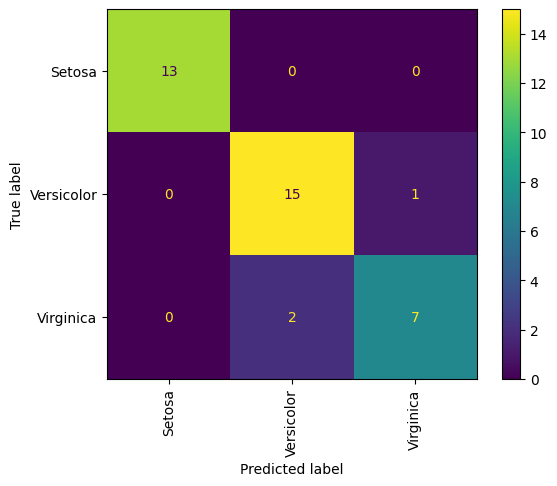

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
y_predictions = []

clf = RandomForestClassifier()
pipe = create_pipeline(imputer, scaler, encoder, clf)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
        y_true=y_test, 
        y_pred=y_pred, 
        display_labels=['Setosa', 'Versicolor', 'Virginica'], 
        xticks_rotation="vertical"
        )

Besides a visual representation of the predictions, the Confusion Matrix can actually be used to deduce actual performance metrics. <br>
These metrics will show a trade-off between all the categories (TP, FP, TN, FN) and return a single numerical value. <br>
The reason different metrics are available is that with different tasks there is a different need for evaluation. <br>
For example, in our previous fruit example it does not matter if you make either a FP or a FN, they both are equally bad. <br>
But if you are for example predicting if a patient has cancer based on a given set of values, a FN can be way more damaging than a FP.

The following metric can be deduced from a Confusion Matrix:

* **Precision** - The fraction of True predictions where actually True.
* **Recall** - The fraction of actually True labels where predicted to be True.
* **F1-Score** - The harmonic mean of precision and recall, comparing one class to all other classes.

To evaluate these metrics we will us the Scikit-Learn in-built function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). <br>
Calling this function will automatically calculate all three mentioned metrics besides the support, which show the number of samples per class.

In [35]:
print(classification_report(
    y_true=y_test, 
    y_pred=y_pred, 
    target_names=['Setosa', 'Versicolor', 'Virginica']
    ))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.88      0.94      0.91        16
   Virginica       0.88      0.78      0.82         9

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.91        38
weighted avg       0.92      0.92      0.92        38



Concluding from the classification report it can be seen that all metrics show quite good performance. <br>
It can be seen that for the species Virginica the performance is somewhat lower on all three metrics. <br>
However, due to the sheer size of the dataset this might just be a single difficult example that decreases the model performance.

To improve model performance we would need to increase the size of the dataset. <br>
As can be seen in the confusion matrix, two predictions faulty predict either the Versicolor or the Virginica class. <br>
More data might result in the model being able to have a clearer distinction between these species, resulting in increased performance.

[Back to top](#module-4---machine-learning-ml)

<hr>

## Congratulations!!

You have succesfully created your first Machine Learning (ML) models and worked all the way through the CRISP-DM model. <br>
A lot of code was already pre-written, as we perceived from our studies that this is the best way to learn this process. <br>

If all tests are passed you are allowed to continue to our next module <b>Module 5: Application Programming Interface (API) - Basics</b>. <br>
Feel free to return to this module when you need some example code to develop your ML models in the future, for example in the final assignment.